#                                             SOM (Mapas Auto Organizados)

## Camilo Enrique Farelo Panesso

### Que son los SOM?

Es un tipo de red neuronal que utiliza la técnica de aprendizaje no supervisado que representa de manera discretizada y con menos dimensiones las entradas al sistema. Lo que diferencia a este método de el resto de las otras redes neuronales es que usa una función de cercanía que permite que la topología de la red se conserve.

### Como funcionan?

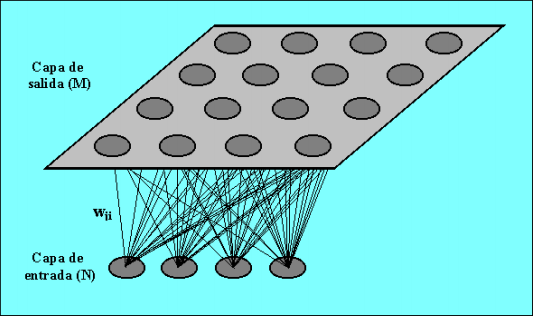

In [15]:
from IPython.display import Image 
Image(filename='SOM.PNG', width=534, height=317)

El SOM consiste en dos fases, la primera que es de entrenamiento donde se construye el mapa y la segunda es el mapeo donde se realiza la clasificación de las características. 
Los nodos se encuentran distribuidos de manera bidimensional y cada uno de estos tiene un vector de pesos que debe ser de la misma dimensión que el vector de entrada.
El algoritmo de funcionamiento es el siguiente:
* Asignar aleatoriamente el vector de pesos de cada nodo. 
* Escoger de manera aleatoria un vector de la base de datos 
* Usar la formula de distancia euclidiana para comparar la entrada con cada nodo y el de menor distancia, será seleccionado como el mejor nodo o el BMU.
* Aplicar la fórmula de actualización del vector de pesos tanto del BMU como de sus vecinos 
* Repetir este los pasos 3 y 4  el número de veces indicado al inicio del programa. 

Después del entrenamiento del SOM a partir de los datos de entradas sigue la creación de la matriz de distancias o mejor conocida como la Matriz U. Para construirla se toma un valor del SOM y se calcula la distancia promedio con sus vecinos de arriba, abajo, izquierda y derecha y el resultado corresponde al valor de esa casilla. Los valores resultantes en la Matriz U son representados en escala de grises lo que indica que los colores oscuros son nodos similares y las regiones blancas representan los límites entre grupos con elementos similares.


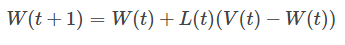

In [18]:
Image(filename='ecuacion.PNG', width=345, height=45)

### Implementacion en codigo

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# note: if this fails, try >pip uninstall matplotlib
# and then >pip install matplotlib

def closest_node(data, t, map, m_rows, m_cols):#Funcion para escoger el nodo más cercano al nodo de entrada
  # (row,col) of map node closest to data[t]
  result = (0,0) #inicializacion del resultado 
  small_dist = 1.0e20 #Inicialización de la menor distancia asignando ese valor grande por defecto
  for i in range(m_rows):#recorrido del mapa
    for j in range(m_cols):
      ed = euc_dist(map[i][j], data[t]) #Llamado de la funcion de distancia euclidiana
      if ed < small_dist: #Compara si la distancia calculada es menor que la actual menor distancia
        small_dist = ed
        result = (i, j) #Asigna la ubicación del nodo cercano
  return result

def euc_dist(v1, v2):#Funcion para la distancia euclidiana entre 2 vectores
  return np.linalg.norm(v1 - v2) 

def manhattan_dist(r1, c1, r2, c2): #Funcion de cercania entre nodos
  return np.abs(r1-r2) + np.abs(c1-c2)

def most_common(lst, n):
  # lst is a list of values 0 . . n
  if len(lst) == 0: return -1
  counts = np.zeros(shape=n, dtype=np.int)
  for i in range(len(lst)):
    counts[lst[i]] += 1
  return np.argmax(counts)

In [17]:
def main():
  # 0. get started
  np.random.seed(1)
  Dim = 4 #Dimension que tendra cada vector correspondiente a un nodo del mapa
  Rows = 30; Cols = 30 #La red neuronal tendra una dimension de 30 x 30 
  RangeMax = Rows + Cols
  LearnMax = 0.5
  StepsMax = 5000 #Número de iteraciones

  # 1. load data
  print("\nLoading Iris data into memory \n")
  data_file = "iris_data_012.txt"
  data_x = np.loadtxt(data_file, delimiter=",", usecols=range(0,4),
    dtype=np.float64)
  data_y = np.loadtxt(data_file, delimiter=",", usecols=[4],
    dtype=np.int)
  # option: normalize data  

  # 2. Construccion del SOM
  print("Constructing a 30x30 SOM from the iris data")
  map = np.random.random_sample(size=(Rows,Cols,Dim))#Crea una matriz aleatoria con las dimensiones específicadas para la red Neuronal 
  for s in range(StepsMax):#Comienzan las iteraciones
    if s % (StepsMax/10) == 0: print("step = ", str(s))
    pct_left = 1.0 - ((s * 1.0) / StepsMax) #Porcentaje restante de entrenamiento del SOM
    curr_range = (int)(pct_left * RangeMax) #Rango de Proximidad
    curr_rate = pct_left * LearnMax #Tasa de aprendizaje

    t = np.random.randint(len(data_x))#Se escoge una fila aleatoria para las entradas al sistema
    (bmu_row, bmu_col) = closest_node(data_x, t, map, Rows, Cols)#Seleccion del mejor Nodo
    for i in range(Rows):#actualizacion del vector de pesos tanto del BMU como de los vecinos
      for j in range(Cols):
        if manhattan_dist(bmu_row, bmu_col, i, j) < curr_range:#es para determinar si un nodo es vecino cercanos del BMU
          map[i][j] = map[i][j] + curr_rate * (data_x[t] - map[i][j])#Formula para actualizar vector de pesos
  print("SOM construction complete \n")

  # 3. Construccion de la Matriz U
  print("Constructing U-Matrix from SOM")
  u_matrix = np.zeros(shape=(Rows,Cols), dtype=np.float64)#Matriz de ceros
  for i in range(Rows):#Recorrido de la matriz
    for j in range(Cols):
      v = map[i][j]  # a vector 
      sum_dists = 0.0; ct = 0#Inicializacion de la suma de distancias y el conteo
     
      if i-1 >= 0:    # distancia euclidiana para el valor actual con su vecino de encima
        sum_dists += euc_dist(v, map[i-1][j]); ct += 1
      if i+1 <= Rows-1:   # distancia euclidiana para el valor actual con su vecino de abajo
        sum_dists += euc_dist(v, map[i+1][j]); ct += 1
      if j-1 >= 0:   # distancia euclidiana para el valor actual con su vecino de la izquierda
        sum_dists += euc_dist(v, map[i][j-1]); ct += 1
      if j+1 <= Cols-1:   # distancia euclidiana para el valor actual con su vecino de la derecha
        sum_dists += euc_dist(v, map[i][j+1]); ct += 1
      
      u_matrix[i][j] = sum_dists / ct #Asigna el valor en cada casilla en la matriz U
  print("U-Matrix constructed \n")

  # Imprime la Matriz U
  plt.imshow(u_matrix, cmap='gray')  # black = close = clusters
  plt.show()


Loading Iris data into memory 

Constructing a 30x30 SOM from the iris data
step =  0
step =  500
step =  1000
step =  1500
step =  2000
step =  2500
step =  3000
step =  3500
step =  4000
step =  4500
SOM construction complete 

Constructing U-Matrix from SOM
U-Matrix constructed 



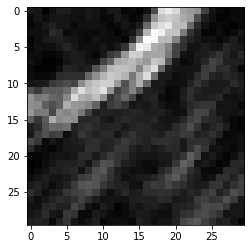

In [12]:
main()

### Bibliografia

* https://www.youtube.com/watch?v=9ZhwKv_bUx8
* https://www.youtube.com/watch?v=xbWXvCQzvqw
* https://visualstudiomagazine.com/articles/2019/01/01/self-organizing-maps-python.aspx
* https://www.mii.lt/na/issues/NA_1604/NA16409.pdf
* https://es.wikipedia.org/wiki/Mapa_autoorganizado
* https://en.wikipedia.org/wiki/Self-organizing_map